In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

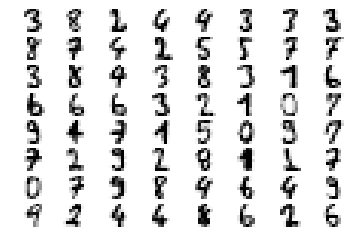

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.52652 stdev: 0.18085
Best fitness: 0.99385 - size: (2, 13) - species 2 - id 72
Average adjusted fitness: 0.463
Mean genetic distance 2.944, standard deviation 0.485
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 3.562 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61039 stdev: 0.20827
Best fitness: 0.99385 - size: (2, 13) - species 2 - id 72
Average adjusted fitness: 0.538
Mean genetic distance 2.952, standard deviation 0.483
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.761 sec (3.661 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65316 stdev: 0.21227
Best fitness: 0.99385 - size: (2, 13) - species 23 - id 72
Average adjusted fitness: 0.527
Mean genetic distance 2.900, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions

Population's average fitness: 0.80183 stdev: 0.20092
Best fitness: 1.00000 - size: (6, 19) - species 33 - id 3558

Best individual in generation 24 meets fitness threshold - complexity: (6, 19)
Class1:0 #class1:162
Class2:2 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.51621 stdev: 0.16978
Best fitness: 0.96273 - size: (2, 13) - species 2 - id 160
Average adjusted fitness: 0.452
Mean genetic distance 2.795, standard deviation 0.441
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.169 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61436 stdev: 0.18550
Best fitness: 0.97516 - size: (3, 15) - species 1 - id 295
Average adjusted fitness: 0.472
Mean genetic distance 2.955, standard deviation 0.491
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.309 sec (4.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63208 stdev: 0.18746
Best f

Mean genetic distance 3.241, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 4.181 sec (4.361 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.82632 stdev: 0.18476
Best fitness: 0.99689 - size: (5, 20) - species 3 - id 3333
Average adjusted fitness: 0.796
Mean genetic distance 3.245, standard deviation 0.483
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.636 sec (4.415 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80304 stdev: 0.19465
Best fitness: 0.99689 - size: (5, 20) - species 3 - id 3333
Average adjusted fitness: 0.437
Mean genetic distance 3.284, standard deviation 0.490
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.347 sec (4.418 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.79845 stdev: 0.20645
Best fitness: 0.99689 - size: (5, 20) - species 3 - id 3333
Ave

Mean genetic distance 3.260, standard deviation 0.581
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.784 sec (4.765 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.77719 stdev: 0.20465
Best fitness: 0.99689 - size: (12, 30) - species 35 - id 5330
Average adjusted fitness: 0.739
Mean genetic distance 3.260, standard deviation 0.582
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 5.217 sec (4.812 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.78983 stdev: 0.20379
Best fitness: 0.99689 - size: (12, 30) - species 35 - id 5330
Average adjusted fitness: 0.581
Mean genetic distance 3.253, standard deviation 0.591
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 5.052 sec (4.861 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.80488 stdev: 0.19255
Best fitness: 0.99689 - size: (12, 30) - species 35 - id 53

Mean genetic distance 3.155, standard deviation 0.524
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 3.703 sec (3.476 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71905 stdev: 0.20777
Best fitness: 0.99694 - size: (3, 15) - species 7 - id 923
Average adjusted fitness: 0.557
Mean genetic distance 3.161, standard deviation 0.510
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.648 sec (3.505 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71828 stdev: 0.20977
Best fitness: 0.99694 - size: (3, 15) - species 7 - id 923
Average adjusted fitness: 0.658
Mean genetic distance 3.187, standard deviation 0.518
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 3.876 sec (3.558 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72644 stdev: 0.21121
Best fitness: 0.99694 - size: (4, 18) - species 39 - id 802
Average 

Population's average fitness: 0.76942 stdev: 0.20112
Best fitness: 0.99690 - size: (6, 18) - species 37 - id 2477
Average adjusted fitness: 0.696
Mean genetic distance 3.171, standard deviation 0.491
Population of 188 members in 33 species
Total extinctions: 0
Generation time: 3.693 sec (3.898 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.77811 stdev: 0.19070
Best fitness: 0.99690 - size: (6, 18) - species 37 - id 2477
Average adjusted fitness: 0.549
Mean genetic distance 3.211, standard deviation 0.491
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 3.989 sec (3.927 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.78097 stdev: 0.19225
Best fitness: 0.99690 - size: (6, 18) - species 37 - id 2477
Average adjusted fitness: 0.661
Mean genetic distance 3.167, standard deviation 0.495
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 3.997 sec (3.938 average)

 ******

Mean genetic distance 3.144, standard deviation 0.501
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 4.370 sec (3.990 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75402 stdev: 0.19868
Best fitness: 0.99693 - size: (6, 20) - species 33 - id 1545
Average adjusted fitness: 0.665
Mean genetic distance 3.150, standard deviation 0.504
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 4.285 sec (4.046 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.77365 stdev: 0.18718
Best fitness: 0.99693 - size: (6, 20) - species 33 - id 1545
Average adjusted fitness: 0.396
Mean genetic distance 3.157, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 4.255 sec (4.099 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77485 stdev: 0.19758
Best fitness: 0.99693 - size: (6, 20) - species 33 - id 1545


Mean genetic distance 3.259, standard deviation 0.579
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.795 sec (4.637 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.79229 stdev: 0.18835
Best fitness: 0.99693 - size: (5, 17) - species 3 - id 4532
Average adjusted fitness: 0.525
Mean genetic distance 3.224, standard deviation 0.575
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 5.004 sec (4.685 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.80095 stdev: 0.18882
Best fitness: 0.99693 - size: (5, 17) - species 3 - id 4532
Average adjusted fitness: 0.436
Mean genetic distance 3.218, standard deviation 0.574
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.679 sec (4.735 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.77353 stdev: 0.19522
Best fitness: 0.99693 - size: (5, 17) - species 3 - id 4532
Ave

Population's average fitness: 0.79522 stdev: 0.18478
Best fitness: 0.99692 - size: (5, 17) - species 31 - id 2136
Average adjusted fitness: 0.430
Mean genetic distance 3.114, standard deviation 0.493
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 3.785 sec (3.704 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.76762 stdev: 0.20052
Best fitness: 0.99692 - size: (5, 17) - species 31 - id 2136
Average adjusted fitness: 0.665
Mean genetic distance 3.163, standard deviation 0.498
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 4.116 sec (3.763 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.78154 stdev: 0.19086
Best fitness: 0.99692 - size: (5, 17) - species 31 - id 2136
Average adjusted fitness: 0.627
Mean genetic distance 3.184, standard deviation 0.512
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 3.955 sec (3.795 average)

 ******

Population's average fitness: 0.70214 stdev: 0.18616
Best fitness: 0.99691 - size: (5, 22) - species 20 - id 1077
Average adjusted fitness: 0.334
Mean genetic distance 3.063, standard deviation 0.533
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 3.510 sec (3.275 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74070 stdev: 0.18743
Best fitness: 1.00000 - size: (6, 23) - species 20 - id 1285

Best individual in generation 7 meets fitness threshold - complexity: (6, 23)
Class1:1 #class1:163
Class2:2 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.50070 stdev: 0.11095
Best fitness: 0.91331 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.325
Mean genetic distance 2.885, standard deviation 0.448
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 2.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58509 stdev: 0.12369
Best 

Mean genetic distance 3.224, standard deviation 0.495
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 3.903 sec (4.105 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74070 stdev: 0.16143
Best fitness: 0.96285 - size: (7, 20) - species 3 - id 2748
Average adjusted fitness: 0.367
Mean genetic distance 3.240, standard deviation 0.518
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 3.777 sec (4.095 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74208 stdev: 0.16453
Best fitness: 0.96285 - size: (7, 20) - species 3 - id 2748
Average adjusted fitness: 0.336
Mean genetic distance 3.244, standard deviation 0.524
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 3.920 sec (4.113 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75453 stdev: 0.15364
Best fitness: 0.96285 - size: (7, 20) - species 3 - id 2748
Ave

Mean genetic distance 3.360, standard deviation 0.575
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.618 sec (4.415 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.76663 stdev: 0.16608
Best fitness: 0.97523 - size: (12, 30) - species 11 - id 7065
Average adjusted fitness: 0.352
Mean genetic distance 3.352, standard deviation 0.591
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 4.399 sec (4.418 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.77967 stdev: 0.16940
Best fitness: 0.97523 - size: (12, 30) - species 11 - id 7065
Average adjusted fitness: 0.473
Mean genetic distance 3.354, standard deviation 0.592
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.495 sec (4.443 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.75205 stdev: 0.18234
Best fitness: 0.97523 - size: (12, 30) - species 11 - id 70

Mean genetic distance 3.122, standard deviation 0.499
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.519 sec (3.188 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63196 stdev: 0.16344
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Average adjusted fitness: 0.525
Mean genetic distance 3.122, standard deviation 0.485
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 3.545 sec (3.259 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67368 stdev: 0.15456
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Average adjusted fitness: 0.387
Mean genetic distance 3.114, standard deviation 0.492
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.572 sec (3.311 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68345 stdev: 0.16065
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Average a

Mean genetic distance 3.213, standard deviation 0.499
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.094 sec (4.181 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77491 stdev: 0.17390
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Average adjusted fitness: 0.556
Mean genetic distance 3.205, standard deviation 0.506
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 4.330 sec (4.130 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.78940 stdev: 0.17634
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Average adjusted fitness: 0.532
Mean genetic distance 3.191, standard deviation 0.505
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 4.189 sec (4.080 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76552 stdev: 0.18055
Best fitness: 0.99390 - size: (2, 14) - species 6 - id 355
Averag

Mean genetic distance 3.115, standard deviation 0.595
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 4.321 sec (4.340 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75723 stdev: 0.17699
Best fitness: 0.99695 - size: (7, 24) - species 30 - id 7048
Average adjusted fitness: 0.567
Mean genetic distance 3.123, standard deviation 0.594
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 4.993 sec (4.422 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74695 stdev: 0.19262
Best fitness: 0.99695 - size: (7, 24) - species 30 - id 7048
Average adjusted fitness: 0.563
Mean genetic distance 3.153, standard deviation 0.630
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 4.767 sec (4.455 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.71772 stdev: 0.19702
Best fitness: 0.99695 - size: (7, 24) - species 30 - id 7048


Mean genetic distance 3.147, standard deviation 0.490
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 4.047 sec (3.459 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69932 stdev: 0.15006
Best fitness: 0.95062 - size: (2, 13) - species 31 - id 61
Average adjusted fitness: 0.451
Mean genetic distance 3.165, standard deviation 0.492
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 3.969 sec (3.510 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70218 stdev: 0.14921
Best fitness: 0.95062 - size: (2, 13) - species 31 - id 61
Average adjusted fitness: 0.359
Mean genetic distance 3.157, standard deviation 0.494
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 3.925 sec (3.619 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71790 stdev: 0.14662
Best fitness: 0.95062 - size: (2, 13) - species 31 - id 61
Average

Mean genetic distance 3.190, standard deviation 0.537
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.538 sec (4.237 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.73848 stdev: 0.15995
Best fitness: 0.97222 - size: (8, 24) - species 35 - id 3918
Average adjusted fitness: 0.402
Mean genetic distance 3.213, standard deviation 0.531
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.537 sec (4.288 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74355 stdev: 0.16807
Best fitness: 0.97222 - size: (8, 24) - species 35 - id 3918
Average adjusted fitness: 0.478
Mean genetic distance 3.242, standard deviation 0.531
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.463 sec (4.343 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.72948 stdev: 0.16753
Best fitness: 0.97222 - size: (8, 24) - species 35 - id 3918


Mean genetic distance 3.263, standard deviation 0.590
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.726 sec (4.584 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74804 stdev: 0.17100
Best fitness: 0.97531 - size: (11, 32) - species 12 - id 7481
Average adjusted fitness: 0.568
Mean genetic distance 3.251, standard deviation 0.584
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.785 sec (4.615 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.72265 stdev: 0.16989
Best fitness: 0.97531 - size: (11, 32) - species 12 - id 7481
Average adjusted fitness: 0.406
Mean genetic distance 3.274, standard deviation 0.599
Population of 206 members in 15 species
Total extinctions: 0
Generation time: 4.807 sec (4.652 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.71385 stdev: 0.17206
Best fitness: 0.97531 - size: (11, 32) - species 12 - id 74

Mean genetic distance 3.210, standard deviation 0.479
Population of 201 members in 52 species
Total extinctions: 0
Generation time: 3.804 sec (3.714 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70700 stdev: 0.15750
Best fitness: 0.96024 - size: (4, 17) - species 3 - id 1597
Average adjusted fitness: 0.414
Mean genetic distance 3.205, standard deviation 0.479
Population of 210 members in 52 species
Total extinctions: 0
Generation time: 3.910 sec (3.758 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70862 stdev: 0.15165
Best fitness: 0.96942 - size: (7, 19) - species 26 - id 1878
Average adjusted fitness: 0.449
Mean genetic distance 3.219, standard deviation 0.480
Population of 199 members in 52 species
Total extinctions: 0
Generation time: 3.958 sec (3.781 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71793 stdev: 0.14805
Best fitness: 0.96942 - size: (7, 19) - species 26 - id 1878
A

Mean genetic distance 3.306, standard deviation 0.521
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 4.192 sec (4.143 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.73127 stdev: 0.17298
Best fitness: 0.97248 - size: (7, 20) - species 33 - id 3515
Average adjusted fitness: 0.561
Mean genetic distance 3.311, standard deviation 0.527
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 4.143 sec (4.160 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.71126 stdev: 0.19569
Best fitness: 0.97248 - size: (7, 20) - species 33 - id 3515
Average adjusted fitness: 0.522
Mean genetic distance 3.312, standard deviation 0.523
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 4.038 sec (4.151 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74557 stdev: 0.16850
Best fitness: 0.97248 - size: (9, 24) - species 26 - id 5062


Mean genetic distance 3.238, standard deviation 0.575
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.850 sec (4.734 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.72581 stdev: 0.19705
Best fitness: 0.99083 - size: (13, 29) - species 26 - id 7078
Average adjusted fitness: 0.462
Mean genetic distance 3.234, standard deviation 0.568
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.169 sec (4.786 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74326 stdev: 0.18497
Best fitness: 0.99083 - size: (13, 29) - species 26 - id 7078
Average adjusted fitness: 0.643
Mean genetic distance 3.226, standard deviation 0.587
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.944 sec (4.833 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.73988 stdev: 0.18600
Best fitness: 0.99083 - size: (13, 29) - species 26 - id 70

Mean genetic distance 3.264, standard deviation 0.479
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.987 sec (3.898 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74833 stdev: 0.16107
Best fitness: 0.97546 - size: (5, 20) - species 30 - id 2664
Average adjusted fitness: 0.361
Mean genetic distance 3.245, standard deviation 0.489
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 4.048 sec (3.923 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73971 stdev: 0.16928
Best fitness: 0.97546 - size: (7, 25) - species 15 - id 2903
Average adjusted fitness: 0.534
Mean genetic distance 3.296, standard deviation 0.495
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 3.920 sec (3.932 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72895 stdev: 0.17287
Best fitness: 0.97546 - size: (7, 25) - species 15 - id 2903


Mean genetic distance 3.330, standard deviation 0.560
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.577 sec (4.458 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.76771 stdev: 0.17961
Best fitness: 0.99080 - size: (9, 30) - species 15 - id 5180
Average adjusted fitness: 0.593
Mean genetic distance 3.331, standard deviation 0.552
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.417 sec (4.479 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76012 stdev: 0.17821
Best fitness: 0.99080 - size: (9, 30) - species 15 - id 5180
Average adjusted fitness: 0.528
Mean genetic distance 3.323, standard deviation 0.550
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.374 sec (4.474 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.74935 stdev: 0.18503
Best fitness: 0.99080 - size: (9, 30) - species 15 - id 5180


Mean genetic distance 3.289, standard deviation 0.572
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 5.006 sec (4.930 average)
Class1:1 #class1:163
Class2:7 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.48847 stdev: 0.12534
Best fitness: 0.88854 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.442
Mean genetic distance 2.855, standard deviation 0.440
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.791 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55255 stdev: 0.14113
Best fitness: 0.89474 - size: (3, 14) - species 12 - id 248
Average adjusted fitness: 0.487
Mean genetic distance 2.932, standard deviation 0.466
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 3.028 sec (2.909 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59899 stdev: 0.14379
Best fitness: 0.91641 - size: (3, 16) - s

Mean genetic distance 3.266, standard deviation 0.512
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.789 sec (3.889 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.72711 stdev: 0.17315
Best fitness: 0.97214 - size: (7, 20) - species 11 - id 3002
Average adjusted fitness: 0.391
Mean genetic distance 3.280, standard deviation 0.523
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.071 sec (3.908 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.74695 stdev: 0.16853
Best fitness: 0.97214 - size: (7, 20) - species 11 - id 3002
Average adjusted fitness: 0.354
Mean genetic distance 3.295, standard deviation 0.534
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 3.877 sec (3.910 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71993 stdev: 0.17509
Best fitness: 0.97214 - size: (7, 20) - species 11 - id 3002


Mean genetic distance 3.302, standard deviation 0.569
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 4.409 sec (4.246 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.74992 stdev: 0.17478
Best fitness: 0.98452 - size: (9, 25) - species 11 - id 6873
Average adjusted fitness: 0.416
Mean genetic distance 3.296, standard deviation 0.556
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.506 sec (4.281 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72925 stdev: 0.18495
Best fitness: 0.98452 - size: (9, 25) - species 11 - id 6873
Average adjusted fitness: 0.501
Mean genetic distance 3.297, standard deviation 0.560
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.168 sec (4.284 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.73448 stdev: 0.18039
Best fitness: 0.98452 - size: (9, 25) - species 11 - id 6873


Mean genetic distance 3.037, standard deviation 0.452
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 3.572 sec (3.206 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59523 stdev: 0.10983
Best fitness: 0.85625 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.286
Mean genetic distance 3.037, standard deviation 0.464
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 3.476 sec (3.251 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60351 stdev: 0.11431
Best fitness: 0.85625 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.296
Mean genetic distance 3.054, standard deviation 0.457
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 3.358 sec (3.267 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60811 stdev: 0.11418
Best fitness: 0.85625 - size: (2, 13) - species 34 - id 144
Average 

Mean genetic distance 3.223, standard deviation 0.503
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 3.990 sec (3.880 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67167 stdev: 0.13517
Best fitness: 0.91563 - size: (5, 20) - species 8 - id 2534
Average adjusted fitness: 0.272
Mean genetic distance 3.196, standard deviation 0.512
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 4.059 sec (3.927 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67945 stdev: 0.14075
Best fitness: 0.91563 - size: (5, 20) - species 8 - id 2534
Average adjusted fitness: 0.362
Mean genetic distance 3.199, standard deviation 0.500
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.188 sec (3.978 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66877 stdev: 0.14900
Best fitness: 0.91563 - size: (5, 20) - species 8 - id 2534
Ave

Mean genetic distance 3.098, standard deviation 0.524
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 4.797 sec (4.543 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.72696 stdev: 0.14519
Best fitness: 0.92812 - size: (5, 22) - species 8 - id 5323
Average adjusted fitness: 0.524
Mean genetic distance 3.089, standard deviation 0.525
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.670 sec (4.560 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.70877 stdev: 0.15357
Best fitness: 0.92812 - size: (5, 22) - species 8 - id 5323
Average adjusted fitness: 0.401
Mean genetic distance 3.098, standard deviation 0.522
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.604 sec (4.567 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.70519 stdev: 0.15165
Best fitness: 0.92812 - size: (5, 22) - species 8 - id 5323
Ave

Mean genetic distance 3.138, standard deviation 0.487
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 3.792 sec (3.501 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69681 stdev: 0.13712
Best fitness: 0.90154 - size: (4, 16) - species 33 - id 789
Average adjusted fitness: 0.381
Mean genetic distance 3.130, standard deviation 0.479
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 3.867 sec (3.604 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71337 stdev: 0.13531
Best fitness: 0.90154 - size: (4, 16) - species 33 - id 789
Average adjusted fitness: 0.352
Mean genetic distance 3.132, standard deviation 0.480
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 3.771 sec (3.666 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71216 stdev: 0.13679
Best fitness: 0.90154 - size: (5, 17) - species 33 - id 1592
Av

Mean genetic distance 3.323, standard deviation 0.528
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.254 sec (4.174 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74073 stdev: 0.15511
Best fitness: 0.95077 - size: (13, 37) - species 40 - id 4239
Average adjusted fitness: 0.395
Mean genetic distance 3.308, standard deviation 0.534
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 4.410 sec (4.197 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.75166 stdev: 0.16259
Best fitness: 0.95077 - size: (13, 37) - species 40 - id 4239
Average adjusted fitness: 0.549
Mean genetic distance 3.317, standard deviation 0.529
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.374 sec (4.217 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75219 stdev: 0.15176
Best fitness: 0.95077 - size: (13, 37) - species 40 - id 42

Mean genetic distance 3.230, standard deviation 0.590
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.738 sec (4.839 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.73655 stdev: 0.16633
Best fitness: 0.96308 - size: (7, 24) - species 32 - id 6010
Average adjusted fitness: 0.408
Mean genetic distance 3.233, standard deviation 0.571
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.818 sec (4.833 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.72500 stdev: 0.16738
Best fitness: 0.96308 - size: (7, 24) - species 32 - id 6010
Average adjusted fitness: 0.448
Mean genetic distance 3.191, standard deviation 0.586
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 4.677 sec (4.822 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.73731 stdev: 0.16797
Best fitness: 0.96308 - size: (7, 24) - species 32 - id 6010


Mean genetic distance 3.134, standard deviation 0.494
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.087 sec (3.865 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72489 stdev: 0.16638
Best fitness: 0.96615 - size: (8, 23) - species 7 - id 2407
Average adjusted fitness: 0.503
Mean genetic distance 3.148, standard deviation 0.500
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 4.052 sec (3.906 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72513 stdev: 0.17155
Best fitness: 0.96615 - size: (8, 23) - species 7 - id 2407
Average adjusted fitness: 0.507
Mean genetic distance 3.159, standard deviation 0.494
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 4.236 sec (3.968 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72452 stdev: 0.17516
Best fitness: 0.96923 - size: (8, 24) - species 7 - id 2685
Ave

Mean genetic distance 3.058, standard deviation 0.555
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.601 sec (4.437 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.75235 stdev: 0.16603
Best fitness: 0.98769 - size: (14, 39) - species 36 - id 4366
Average adjusted fitness: 0.324
Mean genetic distance 3.088, standard deviation 0.565
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.631 sec (4.476 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74914 stdev: 0.17007
Best fitness: 0.98769 - size: (14, 39) - species 36 - id 4366
Average adjusted fitness: 0.498
Mean genetic distance 3.099, standard deviation 0.557
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 4.632 sec (4.514 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75374 stdev: 0.16574
Best fitness: 0.98769 - size: (14, 39) - species 36 - id 43

Mean genetic distance 2.970, standard deviation 0.490
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.015 sec (5.059 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.80935 stdev: 0.17891
Best fitness: 0.99385 - size: (18, 44) - species 49 - id 9255
Average adjusted fitness: 0.493
Mean genetic distance 2.948, standard deviation 0.500
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.245 sec (5.085 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.81194 stdev: 0.16174
Best fitness: 0.99385 - size: (18, 44) - species 49 - id 9255
Average adjusted fitness: 0.313
Mean genetic distance 2.921, standard deviation 0.499
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 5.128 sec (5.103 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.81348 stdev: 0.16358
Best fitness: 0.99385 - size: (18, 44) - species 49 - id 92

Mean genetic distance 3.141, standard deviation 0.504
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 3.963 sec (3.865 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.80458 stdev: 0.19685
Best fitness: 0.99688 - size: (2, 14) - species 14 - id 2683
Average adjusted fitness: 0.679
Mean genetic distance 3.165, standard deviation 0.506
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.018 sec (3.890 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.80709 stdev: 0.19287
Best fitness: 0.99688 - size: (2, 14) - species 14 - id 2683
Average adjusted fitness: 0.567
Mean genetic distance 3.172, standard deviation 0.506
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.094 sec (3.923 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.80774 stdev: 0.18991
Best fitness: 0.99688 - size: (2, 14) - species 14 - id 2683


Population's average fitness: 0.68476 stdev: 0.17317
Best fitness: 0.97840 - size: (2, 12) - species 14 - id 949
Average adjusted fitness: 0.604
Mean genetic distance 3.180, standard deviation 0.479
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 3.626 sec (3.411 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68729 stdev: 0.16561
Best fitness: 0.97840 - size: (2, 12) - species 14 - id 949
Average adjusted fitness: 0.347
Mean genetic distance 3.180, standard deviation 0.478
Population of 210 members in 40 species
Total extinctions: 0
Generation time: 4.127 sec (3.491 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68808 stdev: 0.15629
Best fitness: 0.97840 - size: (5, 21) - species 8 - id 1489
Average adjusted fitness: 0.279
Mean genetic distance 3.230, standard deviation 0.476
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 3.964 sec (3.538 average)

 ****** Runn

Population's average fitness: 0.76188 stdev: 0.17394
Best fitness: 0.98457 - size: (3, 14) - species 14 - id 2696
Average adjusted fitness: 0.489
Mean genetic distance 3.340, standard deviation 0.514
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 4.013 sec (4.160 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75852 stdev: 0.16807
Best fitness: 0.98457 - size: (3, 14) - species 14 - id 2696
Average adjusted fitness: 0.446
Mean genetic distance 3.336, standard deviation 0.524
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 4.179 sec (4.180 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74743 stdev: 0.18713
Best fitness: 0.98457 - size: (3, 14) - species 14 - id 2696
Average adjusted fitness: 0.654
Mean genetic distance 3.351, standard deviation 0.519
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.048 sec (4.154 average)

 ******

Population's average fitness: 0.74536 stdev: 0.17909
Best fitness: 0.98765 - size: (9, 25) - species 46 - id 7307
Average adjusted fitness: 0.394
Mean genetic distance 3.238, standard deviation 0.601
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.550 sec (4.558 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74917 stdev: 0.18212
Best fitness: 0.98765 - size: (9, 25) - species 46 - id 7307
Average adjusted fitness: 0.372
Mean genetic distance 3.238, standard deviation 0.619
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.552 sec (4.553 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75759 stdev: 0.17421
Best fitness: 0.98765 - size: (9, 25) - species 46 - id 7307
Average adjusted fitness: 0.414
Mean genetic distance 3.207, standard deviation 0.617
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 4.498 sec (4.548 average)

 ******

Population's average fitness: 0.76248 stdev: 0.19378
Best fitness: 0.99690 - size: (5, 19) - species 31 - id 1729
Average adjusted fitness: 0.616
Mean genetic distance 3.166, standard deviation 0.501
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 3.805 sec (3.712 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74005 stdev: 0.19187
Best fitness: 0.99690 - size: (5, 19) - species 31 - id 1729
Average adjusted fitness: 0.468
Mean genetic distance 3.183, standard deviation 0.499
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 3.894 sec (3.759 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.75861 stdev: 0.20293
Best fitness: 0.99690 - size: (5, 19) - species 31 - id 1729
Average adjusted fitness: 0.574
Mean genetic distance 3.193, standard deviation 0.500
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 3.758 sec (3.780 average)

 ******

Mean genetic distance 2.990, standard deviation 0.468
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 3.241 sec (3.053 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61677 stdev: 0.12813
Best fitness: 0.86120 - size: (3, 15) - species 5 - id 288
Average adjusted fitness: 0.393
Mean genetic distance 3.065, standard deviation 0.479
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.329 sec (3.122 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62366 stdev: 0.11893
Best fitness: 0.86435 - size: (5, 19) - species 27 - id 808
Average adjusted fitness: 0.250
Mean genetic distance 3.090, standard deviation 0.463
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.495 sec (3.197 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64296 stdev: 0.12010
Best fitness: 0.86435 - size: (5, 19) - species 27 - id 808
Average

Mean genetic distance 3.214, standard deviation 0.516
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 3.840 sec (3.884 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70844 stdev: 0.14658
Best fitness: 0.92114 - size: (7, 25) - species 31 - id 3910
Average adjusted fitness: 0.468
Mean genetic distance 3.197, standard deviation 0.528
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 3.796 sec (3.889 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70126 stdev: 0.14493
Best fitness: 0.93691 - size: (5, 24) - species 34 - id 4018
Average adjusted fitness: 0.381
Mean genetic distance 3.192, standard deviation 0.519
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 3.954 sec (3.914 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69841 stdev: 0.14511
Best fitness: 0.93691 - size: (5, 24) - species 34 - id 4018


Mean genetic distance 3.164, standard deviation 0.567
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.943 sec (4.245 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.68252 stdev: 0.14656
Best fitness: 0.94953 - size: (11, 32) - species 45 - id 7236
Average adjusted fitness: 0.276
Mean genetic distance 3.169, standard deviation 0.567
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.414 sec (4.259 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.69333 stdev: 0.14096
Best fitness: 0.94953 - size: (11, 32) - species 45 - id 7236
Average adjusted fitness: 0.399
Mean genetic distance 3.175, standard deviation 0.558
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.541 sec (4.313 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.69424 stdev: 0.14962
Best fitness: 0.95268 - size: (6, 26) - species 34 - id 789

Mean genetic distance 3.053, standard deviation 0.492
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 3.555 sec (3.326 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68153 stdev: 0.17139
Best fitness: 0.95963 - size: (4, 15) - species 27 - id 767
Average adjusted fitness: 0.454
Mean genetic distance 3.086, standard deviation 0.498
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 3.541 sec (3.349 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70349 stdev: 0.15679
Best fitness: 0.95963 - size: (4, 15) - species 27 - id 767
Average adjusted fitness: 0.434
Mean genetic distance 3.092, standard deviation 0.494
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 3.735 sec (3.388 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69088 stdev: 0.16187
Best fitness: 0.95963 - size: (4, 15) - species 27 - id 767
Avera

Mean genetic distance 3.305, standard deviation 0.530
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 3.991 sec (3.985 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73823 stdev: 0.18145
Best fitness: 0.97826 - size: (9, 25) - species 28 - id 4069
Average adjusted fitness: 0.560
Mean genetic distance 3.280, standard deviation 0.537
Population of 206 members in 21 species
Total extinctions: 0
Generation time: 4.144 sec (3.998 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.72589 stdev: 0.18275
Best fitness: 0.97826 - size: (9, 25) - species 28 - id 4069
Average adjusted fitness: 0.643
Mean genetic distance 3.295, standard deviation 0.542
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.328 sec (4.034 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.73983 stdev: 0.18327
Best fitness: 0.97826 - size: (9, 25) - species 28 - id 4069


Mean genetic distance 3.261, standard deviation 0.543
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.148 sec (4.314 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77087 stdev: 0.18995
Best fitness: 0.97826 - size: (9, 25) - species 28 - id 4069
Average adjusted fitness: 0.567
Mean genetic distance 3.283, standard deviation 0.565
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.344 sec (4.305 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75479 stdev: 0.18857
Best fitness: 0.97826 - size: (9, 25) - species 28 - id 4069
Average adjusted fitness: 0.685
Mean genetic distance 3.300, standard deviation 0.589
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.409 sec (4.300 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.78207 stdev: 0.18290
Best fitness: 0.98137 - size: (9, 24) - species 28 - id 8603


Mean genetic distance 3.214, standard deviation 0.484
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 3.977 sec (3.709 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78623 stdev: 0.19320
Best fitness: 0.99693 - size: (3, 14) - species 3 - id 1196
Average adjusted fitness: 0.491
Mean genetic distance 3.238, standard deviation 0.475
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 4.040 sec (3.765 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.78073 stdev: 0.20174
Best fitness: 0.99693 - size: (3, 14) - species 3 - id 1196
Average adjusted fitness: 0.700
Mean genetic distance 3.247, standard deviation 0.474
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 4.199 sec (3.818 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78057 stdev: 0.19765
Best fitness: 0.99693 - size: (3, 14) - species 3 - id 1196
Ave

Population's average fitness: 0.74075 stdev: 0.18049
Best fitness: 0.97264 - size: (5, 18) - species 34 - id 1638
Average adjusted fitness: 0.443
Mean genetic distance 3.165, standard deviation 0.484
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 3.651 sec (3.637 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74167 stdev: 0.17780
Best fitness: 0.97264 - size: (5, 18) - species 34 - id 1638
Average adjusted fitness: 0.530
Mean genetic distance 3.167, standard deviation 0.482
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 3.808 sec (3.661 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75147 stdev: 0.17814
Best fitness: 0.97568 - size: (5, 18) - species 34 - id 2206
Average adjusted fitness: 0.553
Mean genetic distance 3.162, standard deviation 0.491
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 3.935 sec (3.689 average)

 ******

Population's average fitness: 0.75363 stdev: 0.17708
Best fitness: 0.98784 - size: (5, 17) - species 13 - id 2535
Average adjusted fitness: 0.517
Mean genetic distance 3.247, standard deviation 0.500
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.636 sec (4.511 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.74490 stdev: 0.18144
Best fitness: 0.98784 - size: (5, 17) - species 13 - id 2535
Average adjusted fitness: 0.490
Mean genetic distance 3.250, standard deviation 0.496
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.619 sec (4.511 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74875 stdev: 0.18452
Best fitness: 0.98784 - size: (5, 17) - species 13 - id 2535
Average adjusted fitness: 0.406
Mean genetic distance 3.241, standard deviation 0.515
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 4.654 sec (4.542 average)

 ******

Population's average fitness: 0.74536 stdev: 0.17115
Best fitness: 0.99088 - size: (3, 17) - species 44 - id 6954
Average adjusted fitness: 0.582
Mean genetic distance 3.169, standard deviation 0.555
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 5.309 sec (4.933 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74453 stdev: 0.16274
Best fitness: 0.99088 - size: (3, 17) - species 44 - id 6954
Average adjusted fitness: 0.419
Mean genetic distance 3.133, standard deviation 0.559
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 5.144 sec (4.962 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.74626 stdev: 0.17252
Best fitness: 0.99088 - size: (3, 17) - species 44 - id 6954
Average adjusted fitness: 0.624
Mean genetic distance 3.144, standard deviation 0.562
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.906 sec (4.966 average)

 ******

Mean genetic distance 3.187, standard deviation 0.522
Population of 210 members in 34 species
Total extinctions: 0
Generation time: 3.680 sec (3.450 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72025 stdev: 0.17381
Best fitness: 0.99077 - size: (3, 16) - species 33 - id 948
Average adjusted fitness: 0.410
Mean genetic distance 3.152, standard deviation 0.522
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 3.844 sec (3.499 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72340 stdev: 0.18433
Best fitness: 0.99077 - size: (3, 16) - species 33 - id 948
Average adjusted fitness: 0.631
Mean genetic distance 3.165, standard deviation 0.527
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.691 sec (3.520 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72397 stdev: 0.19454
Best fitness: 0.99077 - size: (3, 16) - species 33 - id 948
Averag

Mean genetic distance 3.290, standard deviation 0.564
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.335 sec (4.248 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.79577 stdev: 0.17836
Best fitness: 0.99077 - size: (2, 14) - species 33 - id 971
Average adjusted fitness: 0.438
Mean genetic distance 3.272, standard deviation 0.569
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 4.338 sec (4.269 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78430 stdev: 0.19862
Best fitness: 0.99077 - size: (2, 14) - species 33 - id 971
Average adjusted fitness: 0.662
Mean genetic distance 3.301, standard deviation 0.571
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 4.411 sec (4.303 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.78030 stdev: 0.18081
Best fitness: 0.99077 - size: (2, 14) - species 33 - id 971
Ave

Mean genetic distance 3.125, standard deviation 0.640
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 4.544 sec (4.497 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75151 stdev: 0.18725
Best fitness: 0.99385 - size: (2, 14) - species 33 - id 5584
Average adjusted fitness: 0.516
Mean genetic distance 3.128, standard deviation 0.642
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 4.641 sec (4.502 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.75922 stdev: 0.18332
Best fitness: 0.99385 - size: (2, 14) - species 33 - id 5584
Average adjusted fitness: 0.492
Mean genetic distance 3.110, standard deviation 0.641
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.430 sec (4.498 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75213 stdev: 0.19135
Best fitness: 0.99385 - size: (2, 14) - species 33 - id 5584


Mean genetic distance 3.159, standard deviation 0.475
Population of 190 members in 42 species
Total extinctions: 0
Generation time: 3.807 sec (3.708 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71901 stdev: 0.15372
Best fitness: 0.96273 - size: (5, 19) - species 6 - id 1040
Average adjusted fitness: 0.436
Mean genetic distance 3.160, standard deviation 0.480
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 3.620 sec (3.734 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71670 stdev: 0.14990
Best fitness: 0.96273 - size: (5, 19) - species 6 - id 1040
Average adjusted fitness: 0.462
Mean genetic distance 3.157, standard deviation 0.486
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 4.208 sec (3.784 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69751 stdev: 0.16896
Best fitness: 0.96273 - size: (5, 19) - species 6 - id 1040
Ave

Mean genetic distance 3.270, standard deviation 0.561
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.681 sec (4.460 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.73408 stdev: 0.17137
Best fitness: 0.96894 - size: (6, 19) - species 6 - id 4946
Average adjusted fitness: 0.572
Mean genetic distance 3.266, standard deviation 0.561
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.550 sec (4.493 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.74946 stdev: 0.15824
Best fitness: 0.96894 - size: (6, 19) - species 6 - id 4946
Average adjusted fitness: 0.329
Mean genetic distance 3.263, standard deviation 0.546
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.716 sec (4.558 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.73697 stdev: 0.17154
Best fitness: 0.96894 - size: (6, 19) - species 6 - id 4946
Ave

Mean genetic distance 3.046, standard deviation 0.591
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 5.102 sec (4.906 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.77623 stdev: 0.16067
Best fitness: 0.97826 - size: (6, 18) - species 50 - id 7329
Average adjusted fitness: 0.388
Mean genetic distance 3.101, standard deviation 0.610
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 5.076 sec (4.943 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.79071 stdev: 0.15268
Best fitness: 0.97826 - size: (6, 18) - species 50 - id 7329
Average adjusted fitness: 0.323
Mean genetic distance 3.147, standard deviation 0.576
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 5.285 sec (4.995 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.78199 stdev: 0.15106
Best fitness: 0.97826 - size: (6, 18) - species 50 - id 7329


Mean genetic distance 3.201, standard deviation 0.474
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 3.951 sec (3.878 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68151 stdev: 0.14533
Best fitness: 0.89602 - size: (6, 20) - species 8 - id 1754
Average adjusted fitness: 0.418
Mean genetic distance 3.204, standard deviation 0.479
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 3.977 sec (3.886 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69196 stdev: 0.13678
Best fitness: 0.89602 - size: (6, 20) - species 8 - id 1754
Average adjusted fitness: 0.354
Mean genetic distance 3.175, standard deviation 0.476
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 3.927 sec (3.912 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69824 stdev: 0.14717
Best fitness: 0.90214 - size: (9, 24) - species 34 - id 2588
Av

Mean genetic distance 3.222, standard deviation 0.539
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.592 sec (4.447 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.70971 stdev: 0.15677
Best fitness: 0.95107 - size: (10, 28) - species 4 - id 3535
Average adjusted fitness: 0.311
Mean genetic distance 3.237, standard deviation 0.523
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 4.813 sec (4.499 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.69854 stdev: 0.16307
Best fitness: 0.95107 - size: (10, 28) - species 4 - id 3535
Average adjusted fitness: 0.294
Mean genetic distance 3.232, standard deviation 0.532
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.934 sec (4.570 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.70795 stdev: 0.16092
Best fitness: 0.95107 - size: (10, 28) - species 4 - id 3535


Mean genetic distance 3.213, standard deviation 0.566
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 4.829 sec (4.858 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.70332 stdev: 0.16118
Best fitness: 0.95719 - size: (10, 26) - species 52 - id 8464
Average adjusted fitness: 0.366
Mean genetic distance 3.225, standard deviation 0.564
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 5.016 sec (4.869 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.69497 stdev: 0.16686
Best fitness: 0.95719 - size: (10, 26) - species 52 - id 8464
Average adjusted fitness: 0.436
Mean genetic distance 3.225, standard deviation 0.574
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 5.142 sec (4.891 average)
Class1:4 #class1:161
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.49832 stdev: 0.15169
Best fitness: 0.92

Mean genetic distance 3.290, standard deviation 0.494
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.013 sec (4.077 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74510 stdev: 0.18929
Best fitness: 0.98769 - size: (5, 19) - species 8 - id 2320
Average adjusted fitness: 0.573
Mean genetic distance 3.273, standard deviation 0.487
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 4.300 sec (4.108 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.77942 stdev: 0.16907
Best fitness: 0.98769 - size: (5, 19) - species 8 - id 2320
Average adjusted fitness: 0.374
Mean genetic distance 3.288, standard deviation 0.483
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 4.117 sec (4.130 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.79375 stdev: 0.17292
Best fitness: 0.98769 - size: (5, 19) - species 8 - id 2320
Ave

Mean genetic distance 3.227, standard deviation 0.552
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.757 sec (4.659 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.79684 stdev: 0.17029
Best fitness: 0.99077 - size: (7, 23) - species 23 - id 5262
Average adjusted fitness: 0.313
Mean genetic distance 3.253, standard deviation 0.559
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.089 sec (4.712 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.78429 stdev: 0.18457
Best fitness: 0.99077 - size: (6, 26) - species 42 - id 6793
Average adjusted fitness: 0.594
Mean genetic distance 3.234, standard deviation 0.562
Population of 207 members in 18 species
Total extinctions: 0
Generation time: 4.756 sec (4.735 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.77247 stdev: 0.18197
Best fitness: 0.99077 - size: (6, 26) - species 42 - id 6793


Mean genetic distance 3.013, standard deviation 0.477
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 3.345 sec (3.146 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64400 stdev: 0.16527
Best fitness: 0.95062 - size: (4, 18) - species 11 - id 541
Average adjusted fitness: 0.426
Mean genetic distance 3.025, standard deviation 0.484
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 3.559 sec (3.249 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64979 stdev: 0.18271
Best fitness: 0.95370 - size: (3, 15) - species 2 - id 787
Average adjusted fitness: 0.540
Mean genetic distance 3.074, standard deviation 0.494
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 3.489 sec (3.297 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67276 stdev: 0.17556
Best fitness: 0.98148 - size: (5, 19) - species 30 - id 964
Average

Mean genetic distance 3.218, standard deviation 0.532
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.379 sec (4.023 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74637 stdev: 0.18518
Best fitness: 0.98148 - size: (5, 19) - species 30 - id 964
Average adjusted fitness: 0.529
Mean genetic distance 3.274, standard deviation 0.513
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.251 sec (4.067 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74015 stdev: 0.19458
Best fitness: 0.98148 - size: (5, 19) - species 30 - id 964
Average adjusted fitness: 0.652
Mean genetic distance 3.248, standard deviation 0.523
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.373 sec (4.113 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73885 stdev: 0.18898
Best fitness: 0.98148 - size: (5, 19) - species 30 - id 964
Ave

Mean genetic distance 3.274, standard deviation 0.556
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.187 sec (4.867 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76486 stdev: 0.17835
Best fitness: 0.99383 - size: (9, 30) - species 30 - id 7335
Average adjusted fitness: 0.382
Mean genetic distance 3.304, standard deviation 0.561
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.825 sec (4.899 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76713 stdev: 0.18086
Best fitness: 0.99383 - size: (9, 30) - species 30 - id 7335
Average adjusted fitness: 0.422
Mean genetic distance 3.273, standard deviation 0.566
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.796 sec (4.894 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.78523 stdev: 0.18082
Best fitness: 0.99383 - size: (9, 30) - species 30 - id 7335


Mean genetic distance 3.117, standard deviation 0.540
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 3.365 sec (3.350 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71835 stdev: 0.17349
Best fitness: 0.95639 - size: (5, 20) - species 13 - id 1128
Average adjusted fitness: 0.581
Mean genetic distance 3.102, standard deviation 0.546
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 3.349 sec (3.350 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72305 stdev: 0.16984
Best fitness: 0.95639 - size: (5, 20) - species 13 - id 1128
Average adjusted fitness: 0.559
Mean genetic distance 3.117, standard deviation 0.525
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 3.530 sec (3.368 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71899 stdev: 0.17118
Best fitness: 0.95950 - size: (7, 24) - species 13 - id 1682
Av

Mean genetic distance 3.169, standard deviation 0.541
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.163 sec (3.984 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.74553 stdev: 0.18125
Best fitness: 0.97819 - size: (8, 27) - species 13 - id 3361
Average adjusted fitness: 0.630
Mean genetic distance 3.188, standard deviation 0.542
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.119 sec (4.017 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.73797 stdev: 0.18587
Best fitness: 0.97819 - size: (8, 27) - species 13 - id 3361
Average adjusted fitness: 0.609
Mean genetic distance 3.222, standard deviation 0.533
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.307 sec (4.066 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75927 stdev: 0.17446
Best fitness: 0.97819 - size: (8, 27) - species 13 - id 3361


Mean genetic distance 3.213, standard deviation 0.574
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.959 sec (4.829 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77245 stdev: 0.18260
Best fitness: 0.98754 - size: (9, 25) - species 32 - id 5798
Average adjusted fitness: 0.559
Mean genetic distance 3.201, standard deviation 0.593
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 4.714 sec (4.848 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.80467 stdev: 0.16828
Best fitness: 0.98754 - size: (9, 25) - species 32 - id 5798
Average adjusted fitness: 0.456
Mean genetic distance 3.235, standard deviation 0.591
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 4.947 sec (4.893 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.78588 stdev: 0.16908
Best fitness: 0.98754 - size: (9, 25) - species 44 - id 5798


Mean genetic distance 3.191, standard deviation 0.456
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 3.788 sec (3.664 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70484 stdev: 0.18491
Best fitness: 0.97799 - size: (4, 17) - species 32 - id 1350
Average adjusted fitness: 0.557
Mean genetic distance 3.193, standard deviation 0.473
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 3.735 sec (3.690 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70434 stdev: 0.17696
Best fitness: 0.97799 - size: (4, 17) - species 32 - id 1350
Average adjusted fitness: 0.477
Mean genetic distance 3.202, standard deviation 0.481
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 3.759 sec (3.714 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.73614 stdev: 0.16744
Best fitness: 0.97799 - size: (4, 17) - species 32 - id 1350


Mean genetic distance 3.214, standard deviation 0.518
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 3.981 sec (4.041 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.74588 stdev: 0.18089
Best fitness: 0.98113 - size: (9, 27) - species 35 - id 4065
Average adjusted fitness: 0.443
Mean genetic distance 3.226, standard deviation 0.528
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.137 sec (4.063 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77261 stdev: 0.16986
Best fitness: 0.98113 - size: (9, 27) - species 35 - id 4065
Average adjusted fitness: 0.363
Mean genetic distance 3.248, standard deviation 0.528
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.029 sec (4.065 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.76120 stdev: 0.17346
Best fitness: 0.98113 - size: (9, 27) - species 35 - id 4065


Mean genetic distance 3.133, standard deviation 0.588
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.392 sec (4.417 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.74596 stdev: 0.19292
Best fitness: 0.98113 - size: (9, 20) - species 43 - id 5988
Average adjusted fitness: 0.586
Mean genetic distance 3.152, standard deviation 0.586
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.281 sec (4.397 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.74203 stdev: 0.18534
Best fitness: 0.98428 - size: (10, 29) - species 35 - id 9138
Average adjusted fitness: 0.497
Mean genetic distance 3.122, standard deviation 0.618
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.289 sec (4.397 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74362 stdev: 0.19227
Best fitness: 0.98428 - size: (10, 29) - species 35 - id 913

Mean genetic distance 3.178, standard deviation 0.479
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 4.722 sec (4.196 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76520 stdev: 0.17463
Best fitness: 0.98452 - size: (5, 22) - species 3 - id 2572
Average adjusted fitness: 0.294
Mean genetic distance 3.199, standard deviation 0.471
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 4.409 sec (4.253 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75741 stdev: 0.18304
Best fitness: 0.98452 - size: (5, 22) - species 3 - id 2572
Average adjusted fitness: 0.566
Mean genetic distance 3.208, standard deviation 0.485
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 4.580 sec (4.315 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.76293 stdev: 0.18593
Best fitness: 0.98452 - size: (5, 22) - species 3 - id 2572
Ave

Mean genetic distance 3.301, standard deviation 0.546
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.600 sec (4.489 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.78176 stdev: 0.18297
Best fitness: 0.99381 - size: (4, 16) - species 46 - id 3058
Average adjusted fitness: 0.350
Mean genetic distance 3.294, standard deviation 0.547
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.623 sec (4.502 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.77244 stdev: 0.18387
Best fitness: 0.99381 - size: (4, 16) - species 46 - id 3058
Average adjusted fitness: 0.357
Mean genetic distance 3.288, standard deviation 0.562
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.787 sec (4.525 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.80545 stdev: 0.17252
Best fitness: 0.99381 - size: (4, 16) - species 46 - id 3058


Mean genetic distance 2.942, standard deviation 0.554
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.732 sec (4.864 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.76865 stdev: 0.20195
Best fitness: 0.99381 - size: (8, 24) - species 54 - id 8616
Average adjusted fitness: 0.676
Mean genetic distance 2.937, standard deviation 0.568
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.733 sec (4.847 average)
Class1:5 #class1:164
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50763 stdev: 0.15762
Best fitness: 0.96942 - size: (2, 13) - species 5 - id 107
Average adjusted fitness: 0.417
Mean genetic distance 2.813, standard deviation 0.458
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 2.795 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58362 stdev: 0.16162
Best fitness: 0.96942 - size: (2, 13) -

Mean genetic distance 3.214, standard deviation 0.491
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 4.242 sec (4.063 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.78301 stdev: 0.18525
Best fitness: 0.99694 - size: (9, 29) - species 3 - id 2590
Average adjusted fitness: 0.578
Mean genetic distance 3.249, standard deviation 0.504
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 4.331 sec (4.102 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77805 stdev: 0.17678
Best fitness: 0.99694 - size: (9, 29) - species 3 - id 2590
Average adjusted fitness: 0.344
Mean genetic distance 3.265, standard deviation 0.506
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 4.213 sec (4.132 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78278 stdev: 0.19448
Best fitness: 0.99694 - size: (9, 29) - species 3 - id 2590
Ave

Mean genetic distance 3.345, standard deviation 0.579
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.863 sec (4.755 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.76175 stdev: 0.19692
Best fitness: 0.99694 - size: (13, 38) - species 20 - id 5909
Average adjusted fitness: 0.517
Mean genetic distance 3.352, standard deviation 0.574
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.789 sec (4.767 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.74877 stdev: 0.20449
Best fitness: 0.99694 - size: (13, 38) - species 20 - id 5909
Average adjusted fitness: 0.572
Mean genetic distance 3.328, standard deviation 0.557
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.948 sec (4.795 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.74821 stdev: 0.20156
Best fitness: 0.99694 - size: (13, 38) - species 20 - id 59

Mean genetic distance 3.005, standard deviation 0.476
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.369 sec (3.195 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63672 stdev: 0.16516
Best fitness: 0.95679 - size: (4, 18) - species 25 - id 838
Average adjusted fitness: 0.468
Mean genetic distance 3.009, standard deviation 0.471
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.382 sec (3.233 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66865 stdev: 0.15690
Best fitness: 0.96605 - size: (5, 20) - species 27 - id 931
Average adjusted fitness: 0.546
Mean genetic distance 3.030, standard deviation 0.481
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.658 sec (3.304 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69247 stdev: 0.14813
Best fitness: 0.96605 - size: (5, 20) - species 27 - id 931
Averag

Mean genetic distance 3.156, standard deviation 0.513
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 3.934 sec (3.938 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73159 stdev: 0.17842
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Average adjusted fitness: 0.572
Mean genetic distance 3.162, standard deviation 0.536
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.131 sec (3.970 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76153 stdev: 0.15779
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Average adjusted fitness: 0.395
Mean genetic distance 3.174, standard deviation 0.530
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.196 sec (3.984 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.73159 stdev: 0.18241
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Ave

Mean genetic distance 3.272, standard deviation 0.546
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.773 sec (4.612 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75329 stdev: 0.17949
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Average adjusted fitness: 0.406
Mean genetic distance 3.280, standard deviation 0.532
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.695 sec (4.634 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.75714 stdev: 0.17813
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Average adjusted fitness: 0.329
Mean genetic distance 3.307, standard deviation 0.545
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.741 sec (4.671 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.74722 stdev: 0.17534
Best fitness: 0.98148 - size: (5, 22) - species 2 - id 2898
Ave

Mean genetic distance 3.193, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 3.726 sec (3.376 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69236 stdev: 0.17275
Best fitness: 0.97819 - size: (5, 20) - species 24 - id 1539
Average adjusted fitness: 0.635
Mean genetic distance 3.221, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.883 sec (3.426 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68882 stdev: 0.17046
Best fitness: 0.97819 - size: (5, 20) - species 33 - id 1539
Average adjusted fitness: 0.395
Mean genetic distance 3.235, standard deviation 0.494
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.837 sec (3.532 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72492 stdev: 0.16343
Best fitness: 0.97819 - size: (5, 20) - species 33 - id 1539
A

Mean genetic distance 3.221, standard deviation 0.546
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.425 sec (4.127 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74447 stdev: 0.17616
Best fitness: 0.97819 - size: (5, 20) - species 33 - id 1539
Average adjusted fitness: 0.310
Mean genetic distance 3.217, standard deviation 0.549
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.265 sec (4.155 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74961 stdev: 0.16941
Best fitness: 0.97819 - size: (5, 20) - species 33 - id 1539
Average adjusted fitness: 0.456
Mean genetic distance 3.238, standard deviation 0.561
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.321 sec (4.178 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.75349 stdev: 0.16478
Best fitness: 0.97819 - size: (5, 20) - species 33 - id 1539


Mean genetic distance 3.127, standard deviation 0.554
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 5.416 sec (4.946 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75040 stdev: 0.17926
Best fitness: 0.98442 - size: (9, 26) - species 24 - id 7420
Average adjusted fitness: 0.302
Mean genetic distance 3.092, standard deviation 0.551
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 5.162 sec (4.977 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74331 stdev: 0.18557
Best fitness: 0.98442 - size: (9, 26) - species 24 - id 7420
Average adjusted fitness: 0.477
Mean genetic distance 3.102, standard deviation 0.554
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 5.020 sec (4.996 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.74179 stdev: 0.18326
Best fitness: 0.98442 - size: (9, 26) - species 24 - id 7420


Mean genetic distance 3.201, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.170 sec (3.937 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72448 stdev: 0.18047
Best fitness: 0.98466 - size: (4, 17) - species 18 - id 2071
Average adjusted fitness: 0.368
Mean genetic distance 3.210, standard deviation 0.496
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 4.177 sec (3.996 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74383 stdev: 0.17082
Best fitness: 0.98466 - size: (4, 17) - species 18 - id 2071
Average adjusted fitness: 0.424
Mean genetic distance 3.194, standard deviation 0.492
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 4.009 sec (4.027 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73648 stdev: 0.16643
Best fitness: 0.98466 - size: (4, 17) - species 18 - id 2071


Mean genetic distance 3.228, standard deviation 0.584
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.466 sec (4.436 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.74548 stdev: 0.19740
Best fitness: 0.98773 - size: (4, 16) - species 42 - id 4192
Average adjusted fitness: 0.481
Mean genetic distance 3.223, standard deviation 0.594
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.507 sec (4.457 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.75624 stdev: 0.18810
Best fitness: 0.98773 - size: (4, 16) - species 42 - id 4192
Average adjusted fitness: 0.452
Mean genetic distance 3.216, standard deviation 0.588
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.788 sec (4.512 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.76244 stdev: 0.19819
Best fitness: 0.98773 - size: (9, 30) - species 41 - id 5916


Mean genetic distance 2.974, standard deviation 0.545
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.175 sec (5.123 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.79248 stdev: 0.19183
Best fitness: 0.98773 - size: (12, 35) - species 47 - id 9549
Average adjusted fitness: 0.521
Mean genetic distance 2.993, standard deviation 0.552
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 6.048 sec (5.219 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.76982 stdev: 0.20375
Best fitness: 0.99080 - size: (8, 30) - species 31 - id 9732
Average adjusted fitness: 0.531
Mean genetic distance 2.989, standard deviation 0.532
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 5.238 sec (5.213 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.79826 stdev: 0.18903
Best fitness: 0.99080 - size: (8, 30) - species 31 - id 9732

Population's average fitness: 0.61963 stdev: 0.16460
Best fitness: 0.97813 - size: (5, 19) - species 11 - id 672
Average adjusted fitness: 0.455
Mean genetic distance 3.029, standard deviation 0.464
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 3.461 sec (3.168 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64668 stdev: 0.16348
Best fitness: 0.97813 - size: (5, 19) - species 11 - id 672
Average adjusted fitness: 0.494
Mean genetic distance 3.039, standard deviation 0.451
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 3.535 sec (3.241 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65409 stdev: 0.16003
Best fitness: 0.97813 - size: (5, 19) - species 11 - id 672
Average adjusted fitness: 0.427
Mean genetic distance 3.043, standard deviation 0.463
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.596 sec (3.300 average)

 ****** Runn

Population's average fitness: 0.72434 stdev: 0.19234
Best fitness: 0.98750 - size: (7, 24) - species 12 - id 3147
Average adjusted fitness: 0.575
Mean genetic distance 3.253, standard deviation 0.482
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 2.912 sec (3.224 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74538 stdev: 0.18691
Best fitness: 0.98750 - size: (7, 24) - species 12 - id 3147
Average adjusted fitness: 0.379
Mean genetic distance 3.250, standard deviation 0.484
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 2.941 sec (3.189 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77030 stdev: 0.18379
Best fitness: 0.98750 - size: (7, 24) - species 12 - id 3147
Average adjusted fitness: 0.625
Mean genetic distance 3.234, standard deviation 0.477
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 3.207 sec (3.144 average)

 ******

Population's average fitness: 0.78013 stdev: 0.19115
Best fitness: 0.99687 - size: (10, 31) - species 33 - id 6501
Average adjusted fitness: 0.528
Mean genetic distance 3.137, standard deviation 0.537
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 3.299 sec (3.293 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75466 stdev: 0.19069
Best fitness: 0.99687 - size: (10, 31) - species 33 - id 6501
Average adjusted fitness: 0.564
Mean genetic distance 3.167, standard deviation 0.548
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 3.250 sec (3.290 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.73969 stdev: 0.20120
Best fitness: 0.99687 - size: (10, 31) - species 33 - id 6501
Average adjusted fitness: 0.610
Mean genetic distance 3.146, standard deviation 0.543
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 3.410 sec (3.323 average)

 ***

Population's average fitness: 0.50907 stdev: 0.12094
Best fitness: 0.90221 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.353
Mean genetic distance 2.909, standard deviation 0.450
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 1.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56909 stdev: 0.13418
Best fitness: 0.91798 - size: (2, 14) - species 6 - id 367
Average adjusted fitness: 0.412
Mean genetic distance 3.021, standard deviation 0.469
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 2.248 sec (2.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59445 stdev: 0.15308
Best fitness: 0.94953 - size: (2, 13) - species 18 - id 461
Average adjusted fitness: 0.502
Mean genetic distance 3.044, standard deviation 0.469
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 2.319 sec (2.166 average)

 ****** Running generation 3 **

Population's average fitness: 0.75391 stdev: 0.17512
Best fitness: 0.98107 - size: (6, 19) - species 47 - id 1538
Average adjusted fitness: 0.552
Mean genetic distance 3.209, standard deviation 0.499
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 2.864 sec (2.804 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75735 stdev: 0.17390
Best fitness: 0.98107 - size: (6, 19) - species 47 - id 1538
Average adjusted fitness: 0.422
Mean genetic distance 3.214, standard deviation 0.507
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 2.803 sec (2.818 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.74864 stdev: 0.17028
Best fitness: 0.98107 - size: (6, 19) - species 47 - id 1538
Average adjusted fitness: 0.418
Mean genetic distance 3.204, standard deviation 0.492
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 2.884 sec (2.808 average)

 ******

Population's average fitness: 0.76983 stdev: 0.18547
Best fitness: 0.99054 - size: (7, 21) - species 47 - id 4014
Average adjusted fitness: 0.591
Mean genetic distance 3.336, standard deviation 0.540
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 2.980 sec (3.048 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.79770 stdev: 0.15845
Best fitness: 0.99054 - size: (7, 21) - species 47 - id 4014
Average adjusted fitness: 0.352
Mean genetic distance 3.345, standard deviation 0.550
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 3.155 sec (3.055 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.77301 stdev: 0.18229
Best fitness: 0.99054 - size: (7, 21) - species 47 - id 4014
Average adjusted fitness: 0.477
Mean genetic distance 3.339, standard deviation 0.553
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 3.295 sec (3.089 average)

 ******

Generation time: 1.621 sec (1.629 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71359 stdev: 0.17366
Best fitness: 0.95031 - size: (4, 16) - species 1 - id 1098
Average adjusted fitness: 0.486
Mean genetic distance 3.193, standard deviation 0.514
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 1.571 sec (1.621 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72345 stdev: 0.17985
Best fitness: 0.95031 - size: (5, 14) - species 32 - id 1253
Average adjusted fitness: 0.541
Mean genetic distance 3.197, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 1.763 sec (1.639 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70585 stdev: 0.16941
Best fitness: 0.95031 - size: (5, 14) - species 32 - id 1253
Average adjusted fitness: 0.445
Mean genetic distance 3.203, standard deviation 0.499
Population of 198 members in 35 s

Population's average fitness: 0.75669 stdev: 0.18204
Best fitness: 0.97205 - size: (7, 24) - species 8 - id 2406
Average adjusted fitness: 0.608
Mean genetic distance 3.212, standard deviation 0.536
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 1.910 sec (1.867 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76366 stdev: 0.18349
Best fitness: 0.97205 - size: (7, 24) - species 8 - id 2406
Average adjusted fitness: 0.556
Mean genetic distance 3.209, standard deviation 0.551
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 1.937 sec (1.879 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76992 stdev: 0.17167
Best fitness: 0.97205 - size: (7, 24) - species 8 - id 2406
Average adjusted fitness: 0.456
Mean genetic distance 3.194, standard deviation 0.560
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 1.954 sec (1.891 average)

 ****** Ru

Population's average fitness: 0.73344 stdev: 0.19370
Best fitness: 0.98137 - size: (11, 25) - species 40 - id 5694
Average adjusted fitness: 0.622
Mean genetic distance 3.346, standard deviation 0.581
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 2.149 sec (2.128 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.73339 stdev: 0.19473
Best fitness: 0.98137 - size: (11, 25) - species 40 - id 5694
Average adjusted fitness: 0.517
Mean genetic distance 3.347, standard deviation 0.573
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 2.059 sec (2.110 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74958 stdev: 0.18410
Best fitness: 0.98137 - size: (11, 25) - species 40 - id 5694
Average adjusted fitness: 0.478
Mean genetic distance 3.300, standard deviation 0.611
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 1.976 sec (2.006 average)

 ***

Generation time: 1.431 sec (1.393 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67362 stdev: 0.14449
Best fitness: 0.92163 - size: (5, 21) - species 21 - id 1690
Average adjusted fitness: 0.325
Mean genetic distance 3.208, standard deviation 0.491
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 1.532 sec (1.423 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68881 stdev: 0.15505
Best fitness: 0.92163 - size: (5, 21) - species 21 - id 1690
Average adjusted fitness: 0.478
Mean genetic distance 3.224, standard deviation 0.490
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 1.484 sec (1.441 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69877 stdev: 0.14804
Best fitness: 0.92163 - size: (3, 13) - species 26 - id 2042
Average adjusted fitness: 0.386
Mean genetic distance 3.253, standard deviation 0.499
Population of 200 members in 

Mean genetic distance 3.233, standard deviation 0.493
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 1.705 sec (1.706 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.73213 stdev: 0.16538
Best fitness: 0.97492 - size: (7, 27) - species 10 - id 3505
Average adjusted fitness: 0.425
Mean genetic distance 3.227, standard deviation 0.505
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 1.689 sec (1.716 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.73808 stdev: 0.16403
Best fitness: 0.97492 - size: (7, 27) - species 10 - id 3505
Average adjusted fitness: 0.494
Mean genetic distance 3.231, standard deviation 0.511
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 1.630 sec (1.715 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73487 stdev: 0.16532
Best fitness: 0.97492 - size: (7, 27) - species 10 - id 3505


Mean genetic distance 3.201, standard deviation 0.561
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 1.957 sec (1.933 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76709 stdev: 0.17088
Best fitness: 0.97806 - size: (7, 27) - species 41 - id 8800
Average adjusted fitness: 0.348
Mean genetic distance 3.197, standard deviation 0.545
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 1.925 sec (1.941 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.78072 stdev: 0.15836
Best fitness: 0.97806 - size: (7, 27) - species 41 - id 8800
Average adjusted fitness: 0.345
Mean genetic distance 3.176, standard deviation 0.573
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 1.933 sec (1.943 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75820 stdev: 0.16952
Best fitness: 0.97806 - size: (7, 27) - species 41 - id 8800


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.9722222222222222
class1:19/18:class2
Accuracy: 0.8918918918918919
class1:19/20:class2
Accuracy: 0.9230769230769231
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.9166666666666666
class1:19/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.9142857142857143
class1:17/20:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 0.9411764705882353
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:18/20:class2
Accuracy: 0.9473

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8555555555555555

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  2  0  0  0]
 [ 0  0 16  0  0  0  0  0  2  0]
 [ 0  0  0 10  0  0  0  0  0  2]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  1  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  1  0  1  0  0  0 15  0  0]
 [ 0  1  1  4  3  0  0  3 15  0]
 [ 0  0  0  2  0  1  0  0  0 15]]


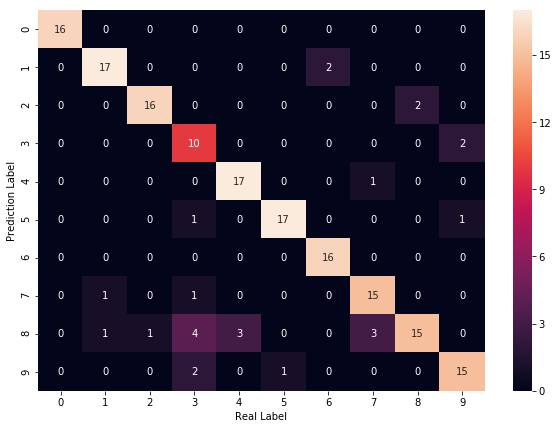

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9517625231910947

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9894512680098377

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1038 Total connections::1315
